In [174]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun  5 12:59:44 2021

@author: LK
"""


import bt
import talib
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [142]:
# import Strategies
from methods import get_indicator_signal, plot_bband_dema

"""

Strategy based on own Signals

"""

#Methods work currently only for one asset at a time
asset = 'BTC-USD'

# 2014-09-16 to 2017-12-31

# Specify
start = '16-09-2014'
end = '31-12-2017'

train_start = '16-09-2014'
train_end = '31-12-2017'

test_start = '01-01-2018'
test_end = '31-12-2019'


train_data = bt.get(asset, start=train_start, end=train_end)
test_data = bt.get(asset, start=test_start, end=test_end)


# BBands
t_bbands = 80
nbdevup = 1
nbdevdn = 1

# DEMA
fast_range = np.arange(20,30, 1)
slow_range = np.arange(90,130,1)
t_fast = 20
t_slow = 100

strat_dict = {}

In [3]:
for t_fast in fast_range:
    for t_slow in slow_range:
        # Get Indicators and Signals 
        indicators,signals = get_indicator_signal(asset=asset,start=start,end=end,t_fast=t_fast,t_slow=t_slow,t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)
        
#         temp_df = bt.merge(indicators,signals)
        
        # Plot the data
#         bband_dema_fig = plot_bband_dema(asset=asset,indicators=indicators,signals=signals)

        # Get the target weights of the DEMA Strategy

        target_weight = pd.DataFrame(signals['DEMA'])
        target_weight.columns = [asset]

        # Create DEMA Strategy

        dema_crossover = bt.Strategy('DEMA_Crossover', 
                                   [bt.algos.WeighTarget(target_weight),
                                    bt.algos.Rebalance()],
                                   )

        #Create and run Backtest

        backtest = bt.Backtest(dema_crossover, pd.DataFrame(indicators[asset]))
        run = bt.run(backtest)
        
        strat_dict[f'{t_fast}_{t_slow}_strategy'] = run

    
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 100  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

# plt.show()

In [4]:
max_return = 0.0
max_return_key = ''
for key in strat_dict:
    current_key_total_return = float(strat_dict[key].stats.loc['total_return'])
    if current_key_total_return > max_return:
        max_return = current_key_total_return
        max_return_key = key
        
# print(float(current_key_total_return))

In [5]:
print(max_return)
print(max_return_key)

5.734961759277349
28_126_strategy


In [140]:
nbdevdn

1

In [146]:
""" 

DEMA-Strategy
- Go long if Fast DEMA > Slow DEMA
- Go short if Fast DEMA < Slow DEMA

"""

t_fast = 28
t_slow = 126

# Get the target weights of the DEMA Strategy

indicators,signals = get_indicator_signal(asset=asset,start=train_start, end=train_end, t_fast=t_fast, t_slow=t_slow, t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)

#         temp_df = bt.merge(indicators,signals)

# Plot the data
#         bband_dema_fig = plot_bband_dema(asset=asset,indicators=indicators,signals=signals)

# Get the target weights of the DEMA Strategy

target_weight = pd.DataFrame(signals['DEMA'])
target_weight.columns = [asset]

# Create DEMA Strategy

dema_crossover = bt.Strategy('DEMA_Crossover', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

#Create and run Backtest

backtest = bt.Backtest(dema_crossover, pd.DataFrame(indicators[asset]))
train_dema_run = bt.run(backtest)

In [172]:
indicators,signals = get_indicator_signal(asset=asset,start=test_start, end=test_end, t_fast=t_fast, t_slow=t_slow, t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)

#         temp_df = bt.merge(indicators,signals)

# Plot the data
#         bband_dema_fig = plot_bband_dema(asset=asset,indicators=indicators,signals=signals)

# Get the target weights of the DEMA Strategy

target_weight = pd.DataFrame(signals['DEMA'])
target_weight.columns = [asset]

# Create DEMA Strategy

dema_crossover = bt.Strategy('DEMA_Crossover', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

#Create and run Backtest

test_dema_backtest = bt.Backtest(dema_crossover, pd.DataFrame(indicators[asset]))
test_dema_run = bt.run(backtest)

Stat                 DEMA_Crossover
-------------------  ----------------
Start                2014-09-15
End                  2018-01-01
Risk-free rate       0.00%

Total Return         446.56%
Daily Sharpe         0.94
Daily Sortino        1.47
CAGR                 67.41%
Max Drawdown         -50.26%
Calmar Ratio         1.34

MTD                  -3.52%
3m                   162.98%
6m                   124.03%
YTD                  -3.52%
1Y                   291.51%
3Y (ann.)            76.13%
5Y (ann.)            67.41%
10Y (ann.)           -
Since Incep. (ann.)  67.41%

Daily Sharpe         0.94
Daily Sortino        1.47
Daily Mean (ann.)    50.20%
Daily Vol (ann.)     53.69%
Daily Skew           -0.10
Daily Kurt           9.93
Best Day             25.24%
Worst Day            -23.95%

Monthly Sharpe       0.98
Monthly Sortino      2.77
Monthly Mean (ann.)  77.90%
Monthly Vol (ann.)   79.17%
Monthly Skew         1.20
Monthly Kurt         1.62
Best Month           69.34%
Worst Month

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


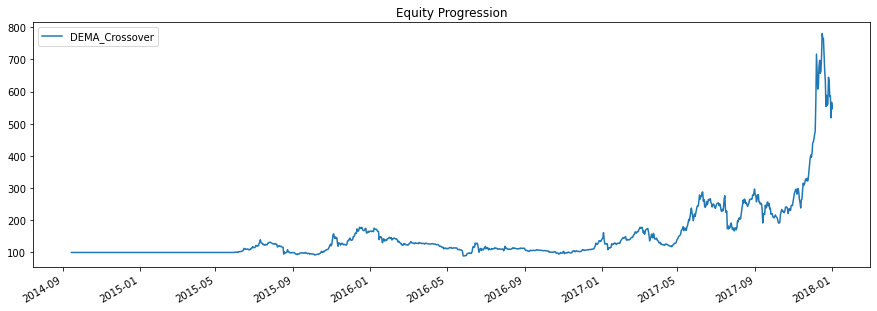

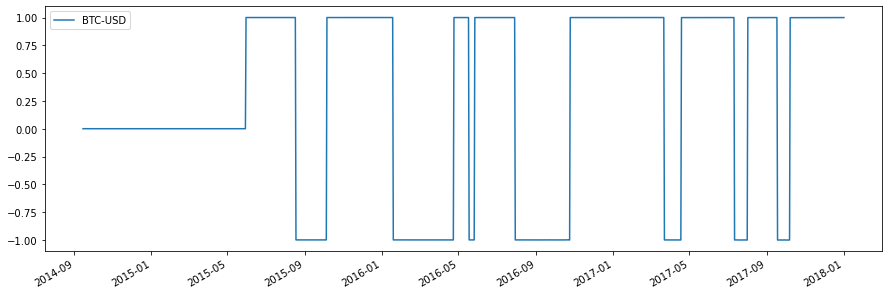

In [6]:
"""

BBANDS Strategy
- Go long if price goes below Upperband

"""


# Get the target weights of the DEMA Strategy

target_weight = pd.DataFrame(signals['BBAND'])
target_weight.columns = [asset]


bbands = bt.Strategy('BDands_Crossover_Up', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

backtest = bt.Backtest(bbands, pd.DataFrame(indicators[asset]))

final_dema_run = bt.run(backtest)

<AxesSubplot:title={'center':'Equity Progression'}>

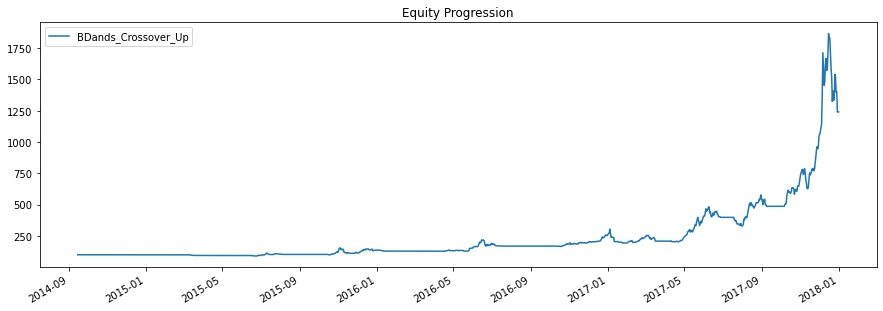

In [7]:
# Display results
run.plot()

In [8]:

# BBands
t_bbands = 80
nbdevup = 1
nbdevdn = 1

t_bbands_range = np.arange(60, 200, 5)
nbdevup_range = np.arange(0.8, 2, 0.1)
nbdevdn_range = np.arange(0.8, 2, 0.1)



bbands_result_dict = {}

for t_bbands in t_bbands_range:
    for nbdevup in nbdevup_range:
        for nbdevdn in nbdevdn_range:
            # Get Indicators and Signals 
            indicators,signals = get_indicator_signal(asset=asset,start=start,end=end,t_fast=t_fast,t_slow=t_slow,t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)

            target_weight = pd.DataFrame(signals['BBAND'])
            target_weight.columns = [asset]


            bbands = bt.Strategy('BDands_Crossover_Up', 
                                       [bt.algos.WeighTarget(target_weight),
                                        bt.algos.Rebalance()],
                                       )

            backtest_bbands = bt.Backtest(bbands, pd.DataFrame(indicators[asset]))
            


            run = bt.run(backtest_bbands)
            
            bbands_result_dict[f'{nbdevdn}_{nbdevup}_{t_bbands}_strategy'] = run
    print(t_bbands)
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 100  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)
            

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

60


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

65


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

70


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

75


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

80


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

85


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

90


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

95


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

100


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

105


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


110


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


115


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


120


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

125


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

130


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

135


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

140


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

145


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

150


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

155


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

160


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

165


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

170


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

175


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

180


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

185


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

190


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divid

195


C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [9]:
max_return = 0.0
max_return_key = ''
for key in bbands_result_dict:
    current_key_total_return = float(bbands_result_dict[key].stats.loc['total_return'])
    if current_key_total_return > max_return:
        max_return = current_key_total_return
        max_return_key = key
        
print(max_return)
print(max_return_key)

22.282565568847655
0.8_1.0_100_strategy


In [11]:
for key in bbands_result_dict:
    print(key)
    print(bbands_result_dict[key].stats.loc['total_return'])
    print('_____________________')

0.8_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
0.9_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.0_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.1_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.2_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.2999999999999998_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.4_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.5_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.5999999999999999_0.8_60_strategy
BDands_Crossover_Up    11.9758
Name: total_return, dtype: object
_____________________
1.69999

BDands_Crossover_Up    11.9942
Name: total_return, dtype: object
_____________________
1.1_1.5_65_strategy
BDands_Crossover_Up    11.9942
Name: total_return, dtype: object
_____________________
1.2_1.5_65_strategy
BDands_Crossover_Up    11.9942
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5_65_strategy
BDands_Crossover_Up    11.9942
Name: total_return, dtype: object
_____________________
1.4_1.5_65_strategy
BDands_Crossover_Up    11.9942
Name: total_return, dtype: object
_____________________
1.5_1.5_65_strategy
BDands_Crossover_Up    11.9942
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5_65_strategy
BDands_Crossover_Up    11.9942
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5_65_strategy
BDands_Crossover_Up    11.9942
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5_65_strategy
BDands_Crossover_Up    11.9942
Name: total_return, dtype: object
___________________

Name: total_return, dtype: object
_____________________
1.0_1.0_75_strategy
BDands_Crossover_Up    10.7549
Name: total_return, dtype: object
_____________________
1.1_1.0_75_strategy
BDands_Crossover_Up    10.7549
Name: total_return, dtype: object
_____________________
1.2_1.0_75_strategy
BDands_Crossover_Up    10.7549
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.0_75_strategy
BDands_Crossover_Up    10.7549
Name: total_return, dtype: object
_____________________
1.4_1.0_75_strategy
BDands_Crossover_Up    10.7549
Name: total_return, dtype: object
_____________________
1.5_1.0_75_strategy
BDands_Crossover_Up    10.7549
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.0_75_strategy
BDands_Crossover_Up    10.7549
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.0_75_strategy
BDands_Crossover_Up    10.7549
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.0_75_strategy
BDands_C

BDands_Crossover_Up    10.3188
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.6999999999999997_80_strategy
BDands_Crossover_Up    10.3188
Name: total_return, dtype: object
_____________________
1.4_1.6999999999999997_80_strategy
BDands_Crossover_Up    10.3188
Name: total_return, dtype: object
_____________________
1.5_1.6999999999999997_80_strategy
BDands_Crossover_Up    10.3188
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.6999999999999997_80_strategy
BDands_Crossover_Up    10.3188
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.6999999999999997_80_strategy
BDands_Crossover_Up    10.3188
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.6999999999999997_80_strategy
BDands_Crossover_Up    10.3188
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.6999999999999997_80_strategy
BDands_Crossover_Up    10.3188
Name: total_return, dtype: object
______

BDands_Crossover_Up    11.33
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.2_90_strategy
BDands_Crossover_Up    11.33
Name: total_return, dtype: object
_____________________
0.8_1.2999999999999998_90_strategy
BDands_Crossover_Up    14.2082
Name: total_return, dtype: object
_____________________
0.9_1.2999999999999998_90_strategy
BDands_Crossover_Up    14.2082
Name: total_return, dtype: object
_____________________
1.0_1.2999999999999998_90_strategy
BDands_Crossover_Up    14.2082
Name: total_return, dtype: object
_____________________
1.1_1.2999999999999998_90_strategy
BDands_Crossover_Up    14.2082
Name: total_return, dtype: object
_____________________
1.2_1.2999999999999998_90_strategy
BDands_Crossover_Up    14.2082
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.2999999999999998_90_strategy
BDands_Crossover_Up    14.2082
Name: total_return, dtype: object
_____________________
1.4_1.2999999999999998_90_strategy
BDands_Crosso

Name: total_return, dtype: object
_____________________
1.8999999999999997_1.8999999999999997_95_strategy
BDands_Crossover_Up    8.61522
Name: total_return, dtype: object
_____________________
0.8_0.8_100_strategy
BDands_Crossover_Up    16.2532
Name: total_return, dtype: object
_____________________
0.9_0.8_100_strategy
BDands_Crossover_Up    16.2532
Name: total_return, dtype: object
_____________________
1.0_0.8_100_strategy
BDands_Crossover_Up    16.2532
Name: total_return, dtype: object
_____________________
1.1_0.8_100_strategy
BDands_Crossover_Up    16.2532
Name: total_return, dtype: object
_____________________
1.2_0.8_100_strategy
BDands_Crossover_Up    16.2532
Name: total_return, dtype: object
_____________________
1.2999999999999998_0.8_100_strategy
BDands_Crossover_Up    16.2532
Name: total_return, dtype: object
_____________________
1.4_0.8_100_strategy
BDands_Crossover_Up    16.2532
Name: total_return, dtype: object
_____________________
1.5_0.8_100_strategy
BDands_Crossove

Name: total_return, dtype: object
_____________________
1.0_1.5_105_strategy
BDands_Crossover_Up    11.6251
Name: total_return, dtype: object
_____________________
1.1_1.5_105_strategy
BDands_Crossover_Up    11.6251
Name: total_return, dtype: object
_____________________
1.2_1.5_105_strategy
BDands_Crossover_Up    11.6251
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.5_105_strategy
BDands_Crossover_Up    11.6251
Name: total_return, dtype: object
_____________________
1.4_1.5_105_strategy
BDands_Crossover_Up    11.6251
Name: total_return, dtype: object
_____________________
1.5_1.5_105_strategy
BDands_Crossover_Up    11.6251
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5_105_strategy
BDands_Crossover_Up    11.6251
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5_105_strategy
BDands_Crossover_Up    11.6251
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5_105_strategy

_____________________
1.5_1.0_115_strategy
BDands_Crossover_Up    19.6098
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.0_115_strategy
BDands_Crossover_Up    19.6098
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.0_115_strategy
BDands_Crossover_Up    19.6098
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.0_115_strategy
BDands_Crossover_Up    19.6098
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.0_115_strategy
BDands_Crossover_Up    19.6098
Name: total_return, dtype: object
_____________________
0.8_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
0.9_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
1.0_1.1_115_strategy
BDands_Crossover_Up    16.8065
Name: total_return, dtype: object
_____________________
1.1_1.1_115_strategy
BDands_Crossover_Up    16.8065
Na

_____________________
1.6999999999999997_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.5999999999999999_120_strategy
BDands_Crossover_Up    11.0101
Name: total_return, dtype: object
_____________________
0.8_1.6999999999999997_120_strategy
BDands_Crossover_Up    5.48071
Name: total_return, dtype: object
_____________________
0.9_1.6999999999999997_120_strategy
BDands_Crossover_Up    5.48071
Name: total_return, dtype: object
_____________________
1.0_1.6999999999999997_120_strategy
BDands_Crossover_Up    5.48071
Name: total_return, dtype: object
_____________________
1.1_1.6999999999999997_120_strategy
BDands_Crossover_Up    5.48071
Name: total_return, dtype: object
_____________________
1.2_1.6999999999999997_120_strategy
BDands_Crossover_Up    5.48071
Name:

Name: total_return, dtype: object
_____________________
1.4_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.5_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.5999999999999999_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.6999999999999997_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.7999999999999998_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
1.8999999999999997_0.8_130_strategy
BDands_Crossover_Up    12.0328
Name: total_return, dtype: object
_____________________
0.8_0.9_130_strategy
BDands_Crossover_Up    11.7025
Name: total_return, dtype: object
_____________________
0.9_0.9_130_strategy
BDands_Crossover_Up    11.7025
Name: total_return, dtype: object
_____________________
1.0_0.9_130_strategy

Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5999999999999999_135_strategy
BDands_Crossover_Up    11.5719
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5999999999999999_135_strategy
BDands_Crossover_Up    11.5719
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5999999999999999_135_strategy
BDands_Crossover_Up    11.5719
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.5999999999999999_135_strategy
BDands_Crossover_Up    11.5719
Name: total_return, dtype: object
_____________________
0.8_1.6999999999999997_135_strategy
BDands_Crossover_Up    8.44676
Name: total_return, dtype: object
_____________________
0.9_1.6999999999999997_135_strategy
BDands_Crossover_Up    8.44676
Name: total_return, dtype: object
_____________________
1.0_1.6999999999999997_135_strategy
BDands_Crossover_Up    8.44676
Name: total_return, dtype: object
_____________________
1.1_1.6999999999999997_

_____________________
1.8999999999999997_1.1_145_strategy
BDands_Crossover_Up    11.2646
Name: total_return, dtype: object
_____________________
0.8_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
0.9_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.0_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.1_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.2_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.4_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: object
_____________________
1.5_1.2_145_strategy
BDands_Crossover_Up    14.9133
Name: total_return, dtype: objec

Name: total_return, dtype: object
_____________________
1.8999999999999997_1.8999999999999997_150_strategy
BDands_Crossover_Up    4.28487
Name: total_return, dtype: object
_____________________
0.8_0.8_155_strategy
BDands_Crossover_Up    18.6131
Name: total_return, dtype: object
_____________________
0.9_0.8_155_strategy
BDands_Crossover_Up    18.6131
Name: total_return, dtype: object
_____________________
1.0_0.8_155_strategy
BDands_Crossover_Up    18.6131
Name: total_return, dtype: object
_____________________
1.1_0.8_155_strategy
BDands_Crossover_Up    18.6131
Name: total_return, dtype: object
_____________________
1.2_0.8_155_strategy
BDands_Crossover_Up    18.6131
Name: total_return, dtype: object
_____________________
1.2999999999999998_0.8_155_strategy
BDands_Crossover_Up    18.6131
Name: total_return, dtype: object
_____________________
1.4_0.8_155_strategy
BDands_Crossover_Up    18.6131
Name: total_return, dtype: object
_____________________
1.5_0.8_155_strategy
BDands_Crossov

BDands_Crossover_Up    7.65043
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.5_160_strategy
BDands_Crossover_Up    7.65043
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.5_160_strategy
BDands_Crossover_Up    7.65043
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.5_160_strategy
BDands_Crossover_Up    7.65043
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.5_160_strategy
BDands_Crossover_Up    7.65043
Name: total_return, dtype: object
_____________________
0.8_1.5999999999999999_160_strategy
BDands_Crossover_Up    6.31026
Name: total_return, dtype: object
_____________________
0.9_1.5999999999999999_160_strategy
BDands_Crossover_Up    6.31026
Name: total_return, dtype: object
_____________________
1.0_1.5999999999999999_160_strategy
BDands_Crossover_Up    6.31026
Name: total_return, dtype: object
_____________________
1.1_1.5999999999999999_160_strategy
BDands_Crossover

BDands_Crossover_Up    11.2405
Name: total_return, dtype: object
_____________________
1.4_1.0_170_strategy
BDands_Crossover_Up    11.2405
Name: total_return, dtype: object
_____________________
1.5_1.0_170_strategy
BDands_Crossover_Up    11.2405
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.0_170_strategy
BDands_Crossover_Up    11.2405
Name: total_return, dtype: object
_____________________
1.6999999999999997_1.0_170_strategy
BDands_Crossover_Up    11.2405
Name: total_return, dtype: object
_____________________
1.7999999999999998_1.0_170_strategy
BDands_Crossover_Up    11.2405
Name: total_return, dtype: object
_____________________
1.8999999999999997_1.0_170_strategy
BDands_Crossover_Up    11.2405
Name: total_return, dtype: object
_____________________
0.8_1.1_170_strategy
BDands_Crossover_Up    10.65
Name: total_return, dtype: object
_____________________
0.9_1.1_170_strategy
BDands_Crossover_Up    10.65
Name: total_return, dtype: object
_______________

0.9_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
1.0_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
1.1_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
1.2_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
1.4_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
1.5_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
_____________________
1.5999999999999999_1.7999999999999998_175_strategy
BDands_Crossover_Up    6.52649
Name: total_return, dtype: object
________

Name: total_return, dtype: object
_____________________
1.8999999999999997_1.2999999999999998_185_strategy
BDands_Crossover_Up    9.76228
Name: total_return, dtype: object
_____________________
0.8_1.4_185_strategy
BDands_Crossover_Up    13.2331
Name: total_return, dtype: object
_____________________
0.9_1.4_185_strategy
BDands_Crossover_Up    13.2331
Name: total_return, dtype: object
_____________________
1.0_1.4_185_strategy
BDands_Crossover_Up    13.2331
Name: total_return, dtype: object
_____________________
1.1_1.4_185_strategy
BDands_Crossover_Up    13.2331
Name: total_return, dtype: object
_____________________
1.2_1.4_185_strategy
BDands_Crossover_Up    13.2331
Name: total_return, dtype: object
_____________________
1.2999999999999998_1.4_185_strategy
BDands_Crossover_Up    13.2331
Name: total_return, dtype: object
_____________________
1.4_1.4_185_strategy
BDands_Crossover_Up    13.2331
Name: total_return, dtype: object
_____________________
1.5_1.4_185_strategy
BDands_Crossov

Name: total_return, dtype: object
_____________________
1.5_0.9_195_strategy
BDands_Crossover_Up    14.3385
Name: total_return, dtype: object
_____________________
1.5999999999999999_0.9_195_strategy
BDands_Crossover_Up    14.3385
Name: total_return, dtype: object
_____________________
1.6999999999999997_0.9_195_strategy
BDands_Crossover_Up    14.3385
Name: total_return, dtype: object
_____________________
1.7999999999999998_0.9_195_strategy
BDands_Crossover_Up    14.3385
Name: total_return, dtype: object
_____________________
1.8999999999999997_0.9_195_strategy
BDands_Crossover_Up    14.3385
Name: total_return, dtype: object
_____________________
0.8_1.0_195_strategy
BDands_Crossover_Up    17.1811
Name: total_return, dtype: object
_____________________
0.9_1.0_195_strategy
BDands_Crossover_Up    17.1811
Name: total_return, dtype: object
_____________________
1.0_1.0_195_strategy
BDands_Crossover_Up    17.1811
Name: total_return, dtype: object
_____________________
1.1_1.0_195_strategy

In [15]:
t = 100
devup = 1.0
devdn = 0.8

# 2018-01-01 to 2019-12-31
# Specify
start = '01-01-2018'
end = '31-12-2019'

indicators,signals = get_indicator_signal(asset=asset,start=start,end=end,t_fast=t_fast,t_slow=t_slow,t_bbands=t_bbands, nbdevup=nbdevup, nbdevdn=nbdevdn)

target_weight = pd.DataFrame(signals['BBAND'])
target_weight.columns = [asset]


bbands = bt.Strategy('BDands_Crossover_Up', 
                           [bt.algos.WeighTarget(target_weight),
                            bt.algos.Rebalance()],
                           )

backtest_bbands = bt.Backtest(bbands, pd.DataFrame(indicators[asset]))



final_boll_run = bt.run(backtest_bbands)

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


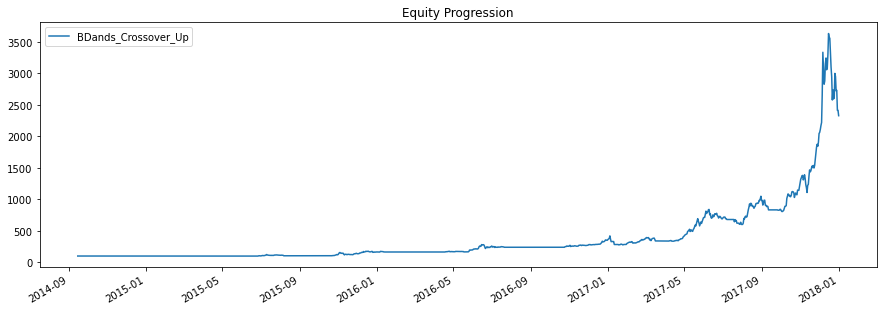

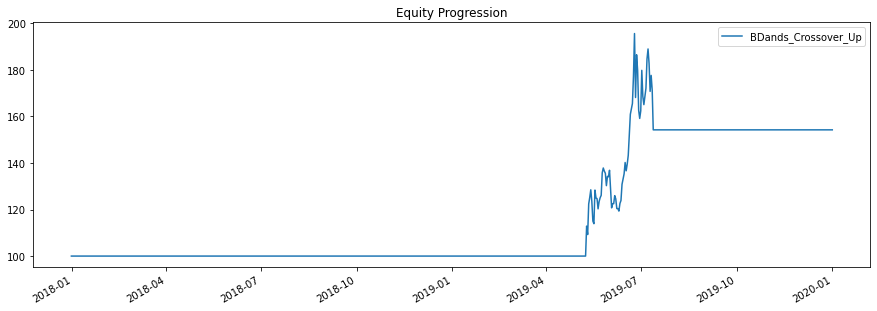

In [16]:
bbands_result_dict['0.8_1.0_100_strategy'].plot()
final_boll_run.plot()
plt.show()

In [17]:
strategy_df = bt.merge(final_boll_run.prices, bbands_result_dict['0.8_1.0_100_strategy'].prices)


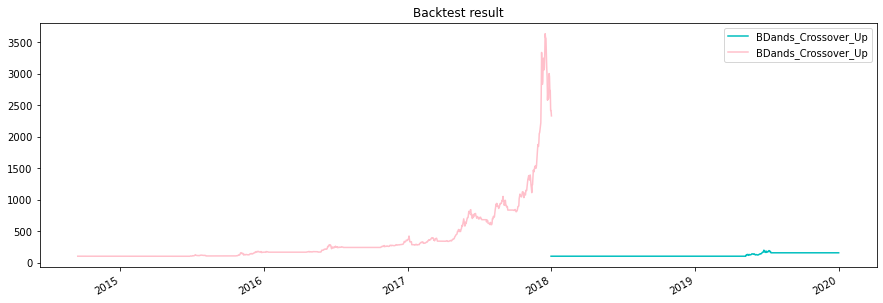

In [25]:
strategy_df.plot(title='Backtest result', color=['c','pink'], figsize=(15,5))
plt.legend()
plt.show()

In [19]:
strategy_df.head()

,BDands_Crossover_Up,BDands_Crossover_Up
2014-09-15,NaN,100.0
2014-09-16,NaN,100.0
2014-09-17,NaN,100.0
2014-09-18,NaN,100.0
2014-09-19,NaN,100.0


In [27]:
sentiment_data = pd.read_excel('./datasets/crypto_sentiment_analysis.xlsx')

In [46]:
sentiment_data = sentiment_data.set_index('Date')
sentiment_data

,score,polarity,subjectivity,btcusd
Date,,,,
2014-09-16,13730,0.227196,0.411736,457.334015
2014-09-17,1124,0.088481,0.473790,424.440002
2014-09-18,1394,0.080334,0.466357,394.795990
2014-09-19,1483,0.082671,0.475161,408.903992
2014-09-20,1011,0.092784,0.467507,398.821014
...,...,...,...,...
2019-12-27,908,0.084943,0.480118,7290.088379
2019-12-28,790,0.080727,0.460008,7317.990234
2019-12-29,920,0.077322,0.469056,7422.652832


In [49]:
bbands_optimization_dataframe = pd.DataFrame(bbands_result_dict.items(), columns=['bband_strategy_name','output'])

In [51]:
bbands_optimization_dataframe = bbands_optimization_dataframe.set_index('bband_strategy_name')

In [52]:
bbands_optimization_dataframe

,output
bband_strategy_name,
0.8_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
0.9_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.0_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.1_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.2_0.8_60_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
...,...
1.5_1.8999999999999997_195_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.5999999999999999_1.8999999999999997_195_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...
1.6999999999999997_1.8999999999999997_195_strategy,{'BDands_Crossover_Up': <ffn.core.PerformanceS...


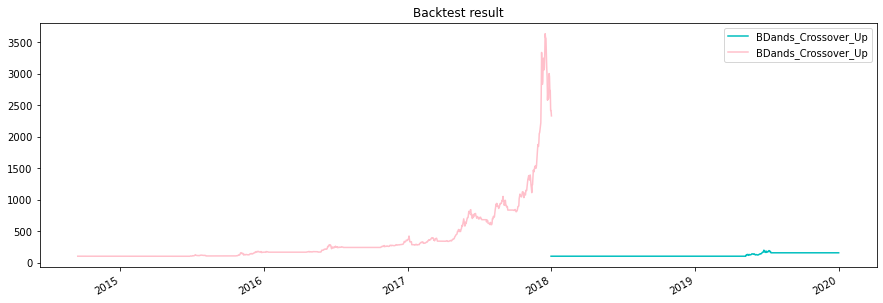

In [47]:
strategy_df.plot(title='Backtest result', color=['c','pink'], figsize=(15,5))
plt.legend()
plt.show()

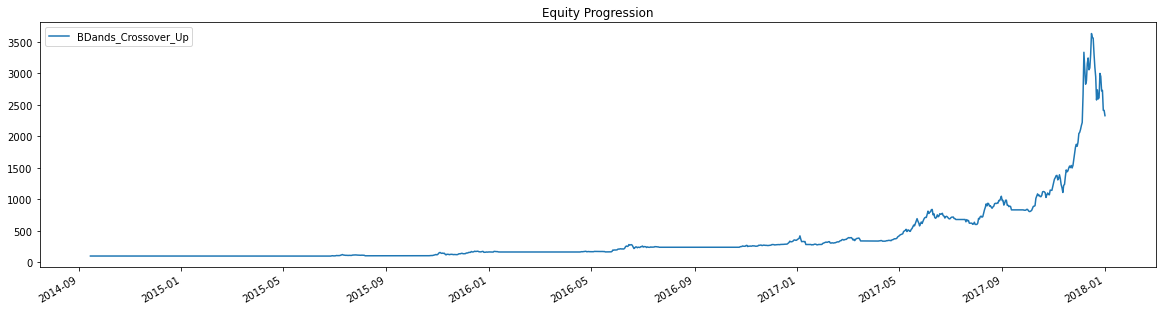

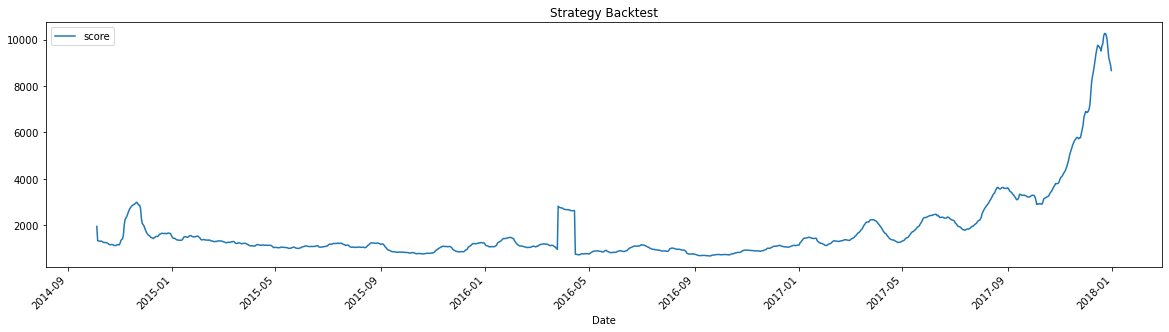

In [89]:
bbands_result_dict['0.8_1.0_100_strategy'].plot(figsize=(20,5))
plt.plot()
plt.show()
sentiment_data.loc[train_start:train_end,'score'].rolling(20).mean().plot(kind = 'line', y='score', rot=45,figsize=(20,5)) # 
# plt.axvline(x='2020-03-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2020-05-03', color='grey', linestyle='--')
plt.title('Strategy Backtest')
# plt.ylabel('index')
plt.legend()
plt.show()
# plt.savefig('./assets/HW_1_1.png') # saving figures
# plt.show()

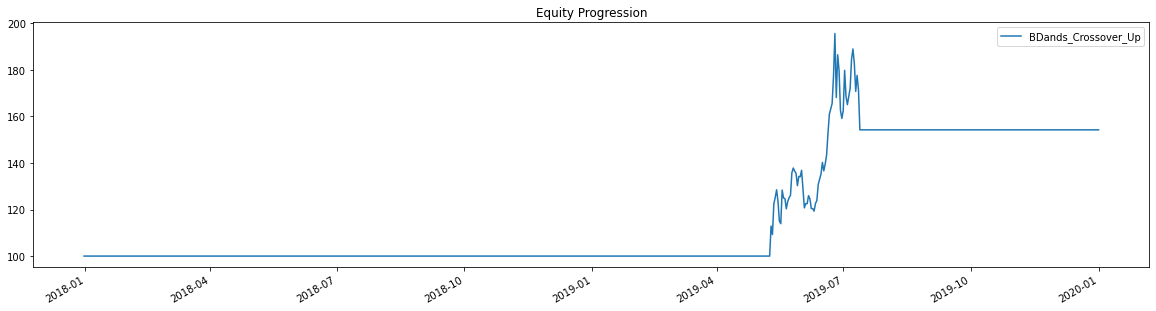

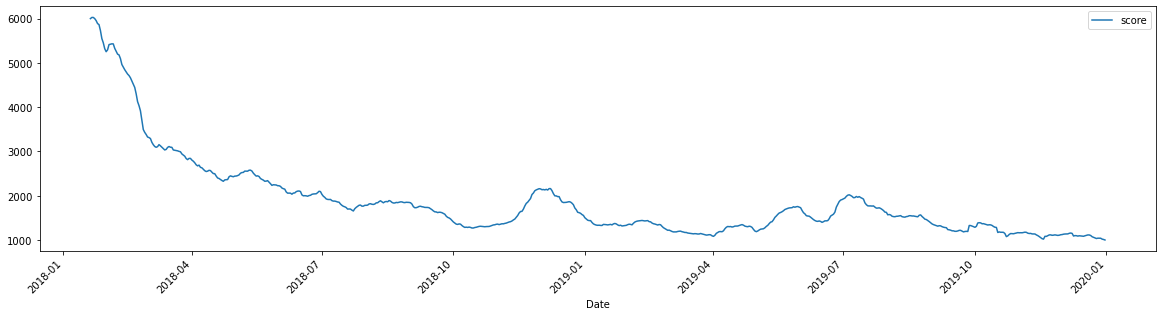

In [91]:
final_boll_run.plot(figsize=(20,5))
plt.plot()
plt.show()
sentiment_data.loc[test_start:test_end,'score'].rolling(20).mean().plot(kind = 'line', y='score', rot=45,figsize=(20,5)) # 
# plt.axvline(x='2020-03-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
# plt.axvline(x='2020-05-03', color='grey', linestyle='--')
# plt.title('Strategy Backtest')
# plt.ylabel('index')
plt.legend()
plt.show()
# plt.savefig('./assets/HW_1_1.png') # saving figures
# plt.show()

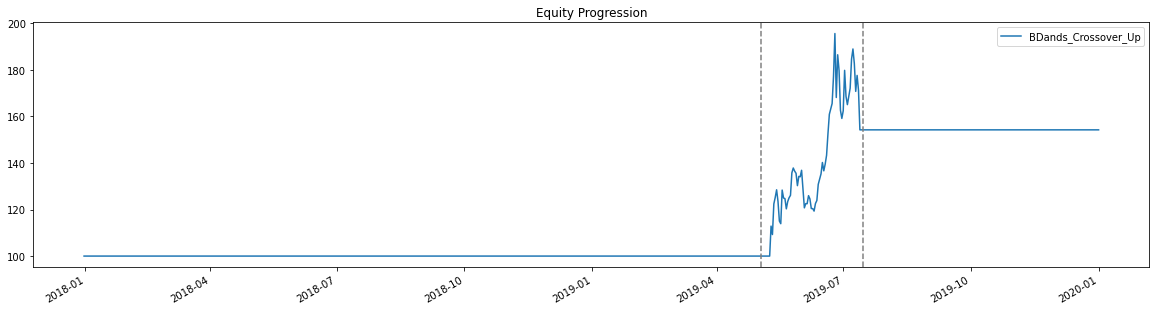

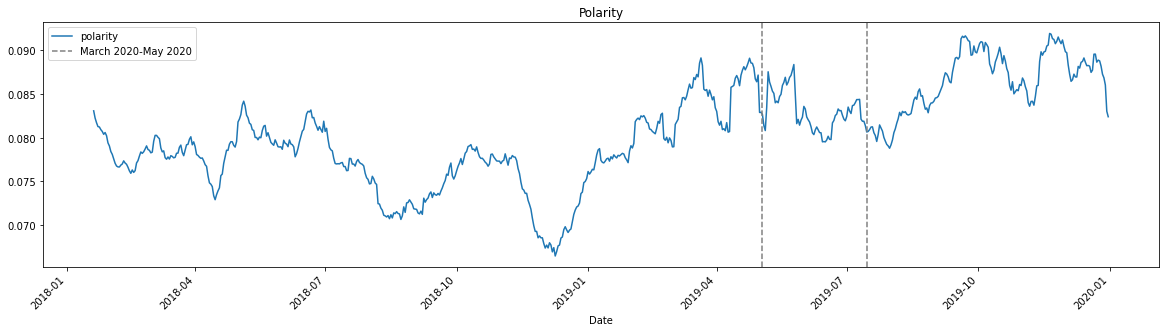

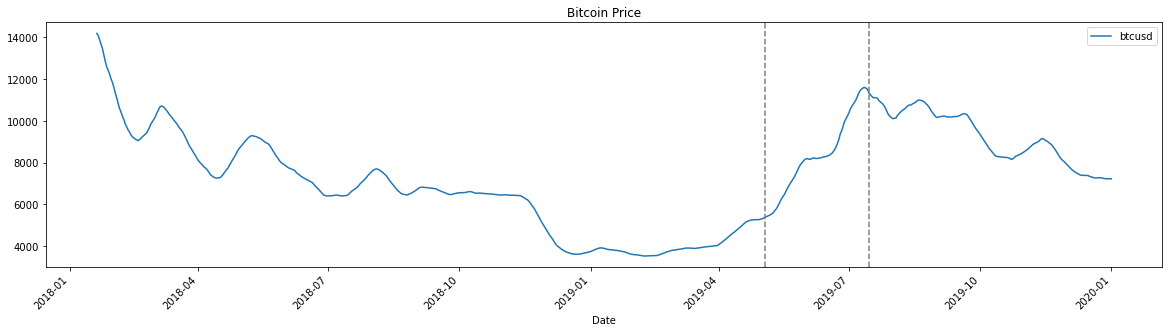

In [102]:
final_boll_run.plot(figsize=(20,5))
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.plot()
plt.show()
sentiment_data.loc[test_start:test_end,'polarity'].rolling(20).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()


test_data.rolling(20).mean().plot(kind = 'line', y='btcusd', rot=45,figsize=(20,5)) # 
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
# plt.savefig('./assets/HW_1_1.png') # saving figures
plt.title('Bitcoin Price')
plt.show()

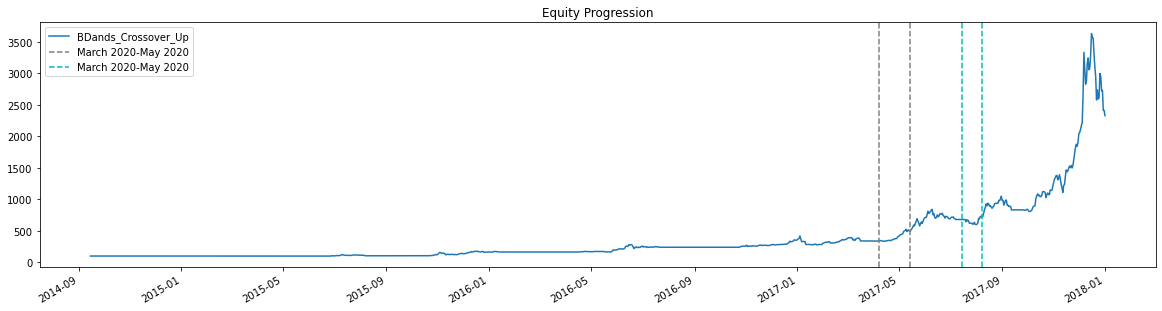

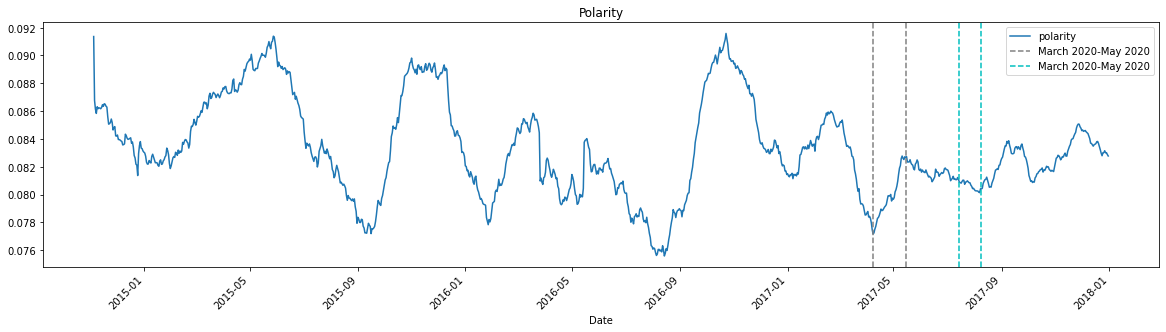

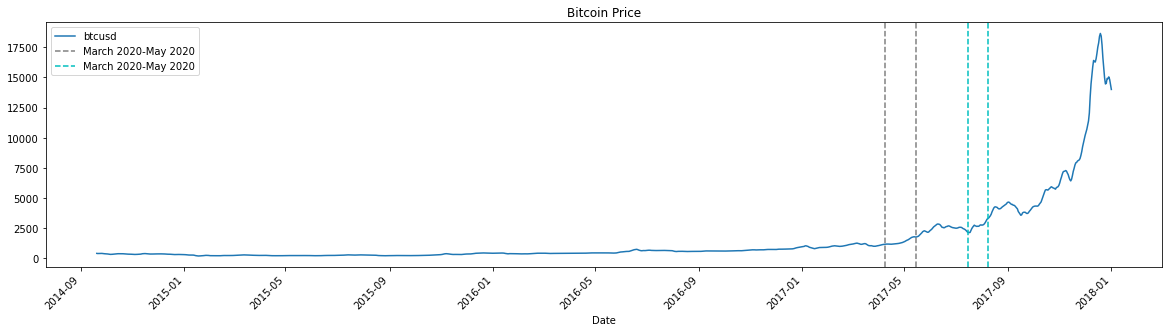

In [125]:
bbands_result_dict['0.8_1.0_100_strategy'].plot(figsize=(20,5))
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.legend()
plt.show()
sentiment_data.loc[train_start:train_end,'polarity'].rolling(50).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()


train_data.rolling(5).mean().plot(kind = 'line', y='btcusd', rot=45,figsize=(20,5)) # 
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
# plt.savefig('./assets/HW_1_1.png') # saving figures
plt.title('Bitcoin Price')
plt.legend()
plt.show()

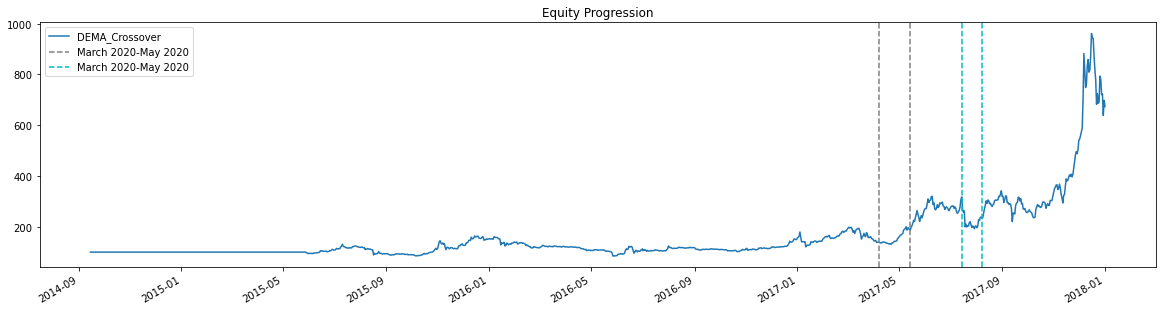

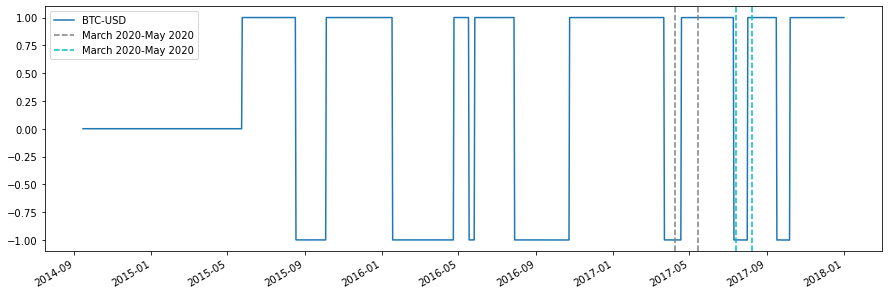

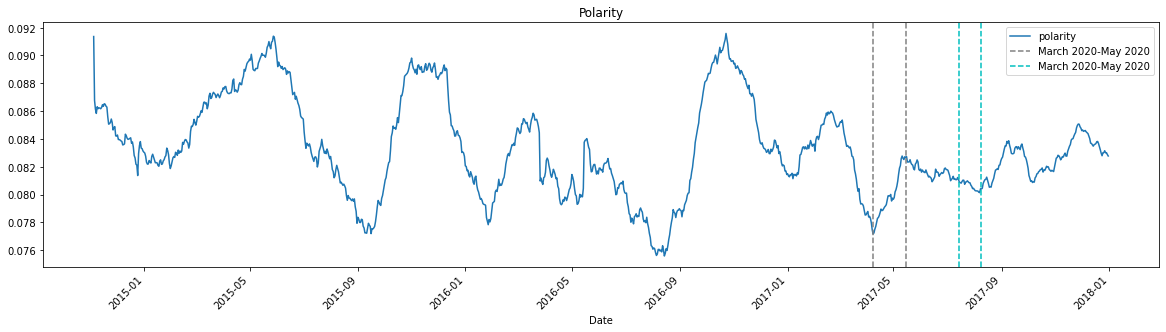

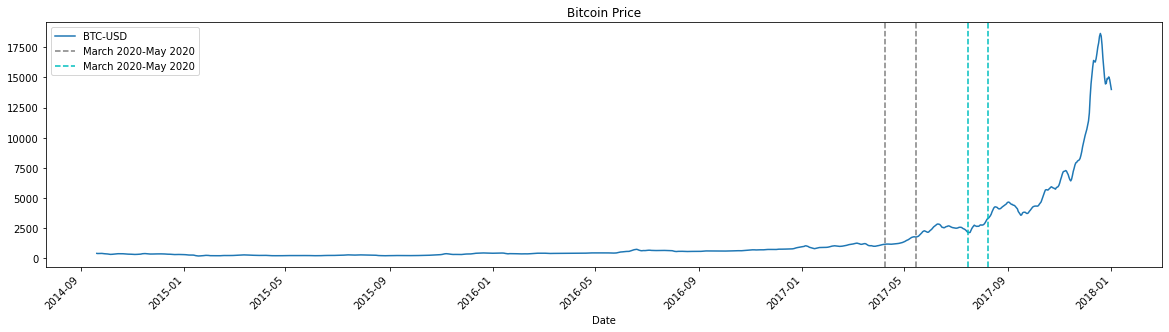

In [218]:
train_dema_run.plot(figsize=(20,5))
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.legend()
plt.show()

train_dema_run.plot_security_weights()
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.title('Weights')
plt.legend()
plt.show()

sentiment_data.loc[train_start:train_end,'polarity'].rolling(50).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()

train_data.rolling(5).mean().plot(kind = 'line', y='BTC-USD', rot=45,figsize=(20,5)) # 
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
# plt.savefig('./assets/HW_1_1.png') # saving figures
plt.title('Bitcoin Price')
plt.legend()
plt.show()

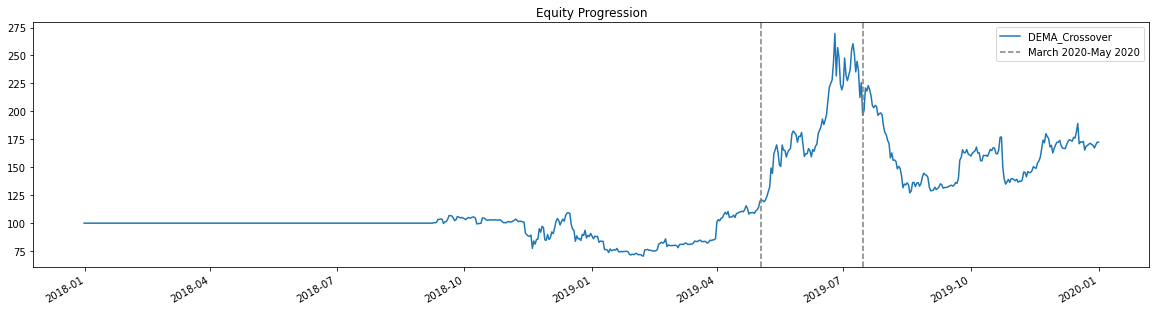

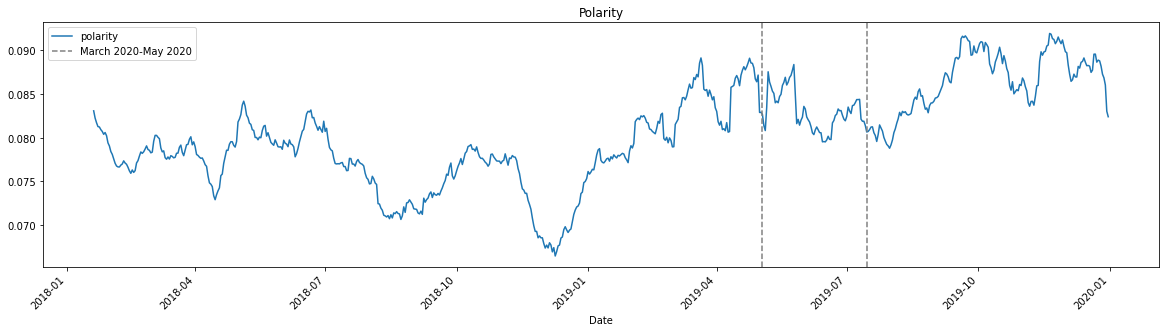

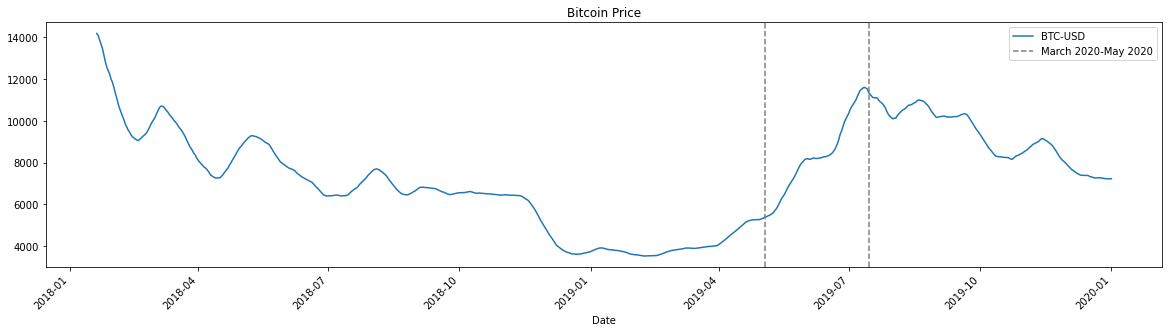

In [217]:
test_dema_run.plot(figsize=(20,5))
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.plot()
plt.legend()
plt.show()
sentiment_data.loc[test_start:test_end,'polarity'].rolling(20).mean().plot(kind = 'line', y='polarity', rot=45,figsize=(20,5)) # 
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.title('Polarity')
# plt.ylabel('index')
plt.legend()
plt.show()


test_data.rolling(20).mean().plot(kind = 'line', y='BTC-USD', rot=45,figsize=(20,5)) # 
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
# plt.savefig('./assets/HW_1_1.png') # saving figures
plt.title('Bitcoin Price')
plt.legend()
plt.show()

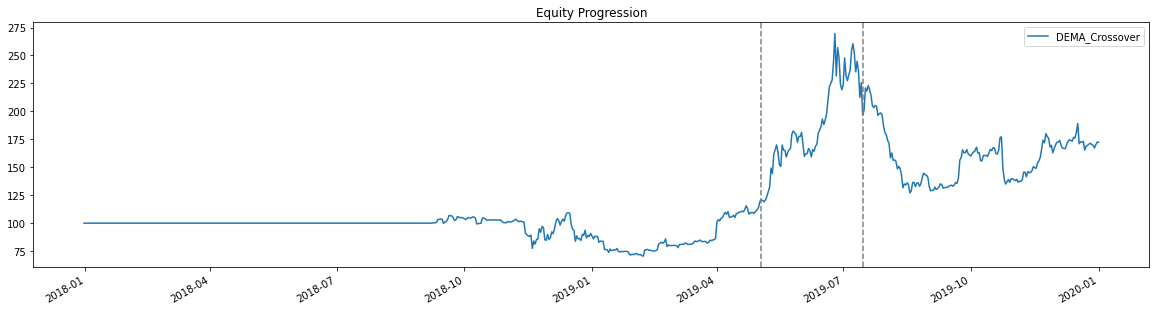

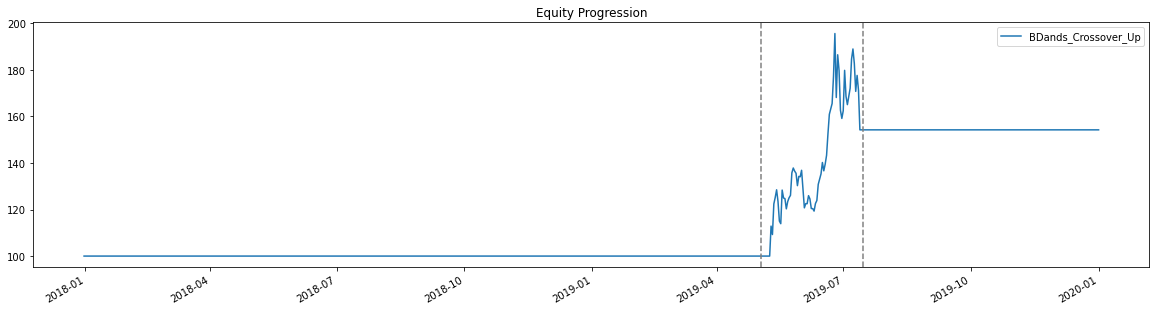

In [155]:
test_dema_run.plot(figsize=(20,5))
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.plot()
plt.show()

final_boll_run.plot(figsize=(20,5))
plt.axvline(x='2019-05-03', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2019-07-15', color='grey', linestyle='--')
plt.plot()
plt.show()

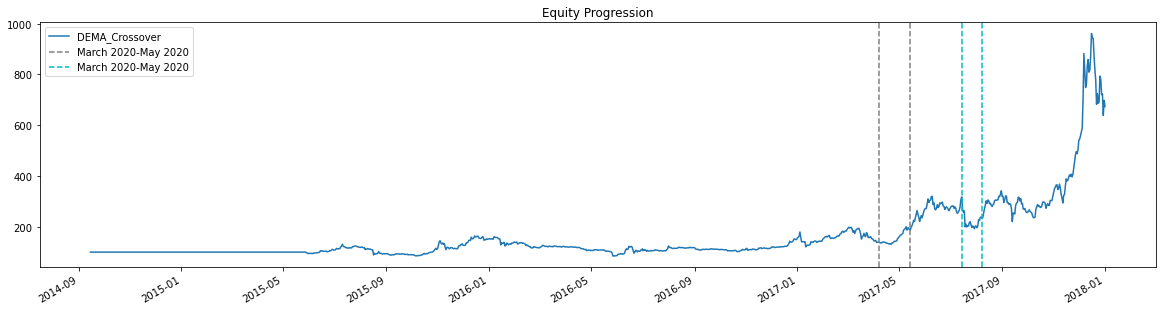

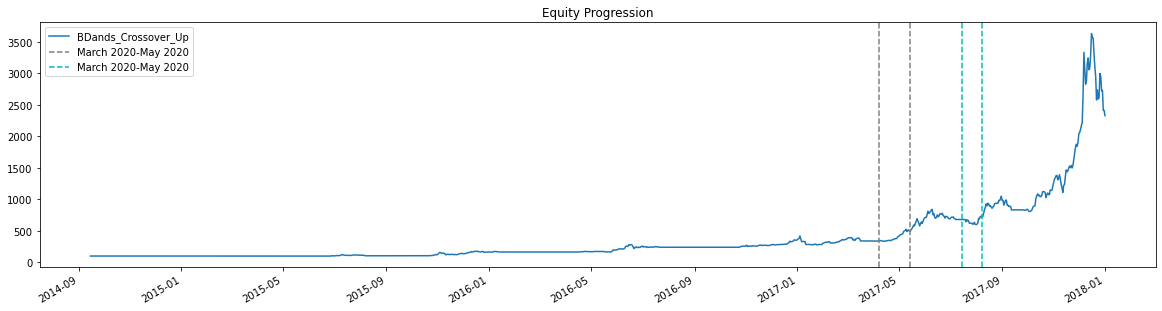

In [156]:
train_dema_run.plot(figsize=(20,5))
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.legend()
plt.show()

bbands_result_dict['0.8_1.0_100_strategy'].plot(figsize=(20,5))
plt.axvline(x='2017-04-8', linestyle='--', color='grey', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-05-15', color='grey', linestyle='--')
plt.axvline(x='2017-08-8', linestyle='--', color='c', label='March 2020-May 2020') # plotting date flags
plt.axvline(x='2017-07-15', color='c', linestyle='--')
plt.plot()
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Equity Progression'}>

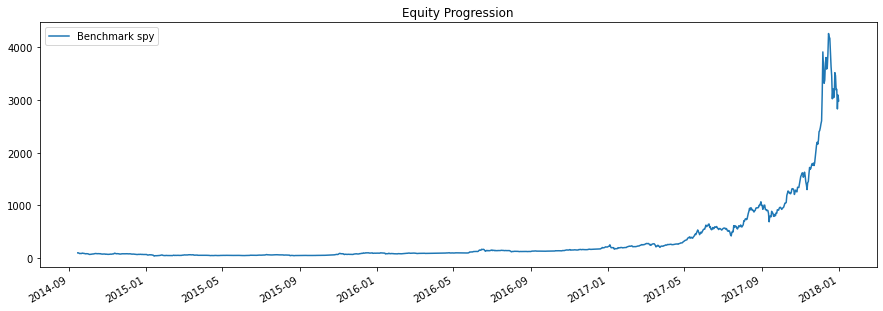

In [161]:
# train Benchmark
btc_data=bt.get('btc-usd ', start=train_start, end= train_end)
long_only_ew = bt.Strategy('Benchmark spy', [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
test_benchmark = bt.Backtest(long_only_ew, btc_data)
res_benchmark = bt.run(test_benchmark)

#strategies' results and benchmark
train_bench=bt.run(test_benchmark)


train_bench.plot()

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


<AxesSubplot:title={'center':'Equity Progression'}>

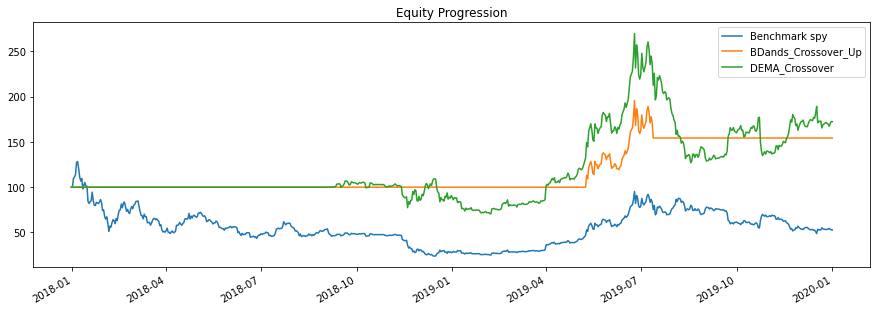

In [173]:
# train Benchmark
btc_data=bt.get('btc-usd ', start=test_start, end= test_end)
long_only_ew = bt.Strategy('Benchmark spy', [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
test_benchmark = bt.Backtest(long_only_ew, btc_data)
res_benchmark = bt.run(test_benchmark)

#strategies' results and benchmark
test_bench = bt.run(test_benchmark, backtest_bbands, test_dema_backtest)


test_bench.plot()

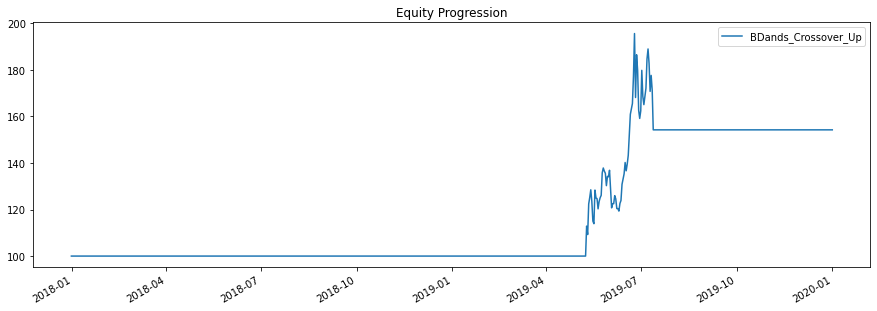

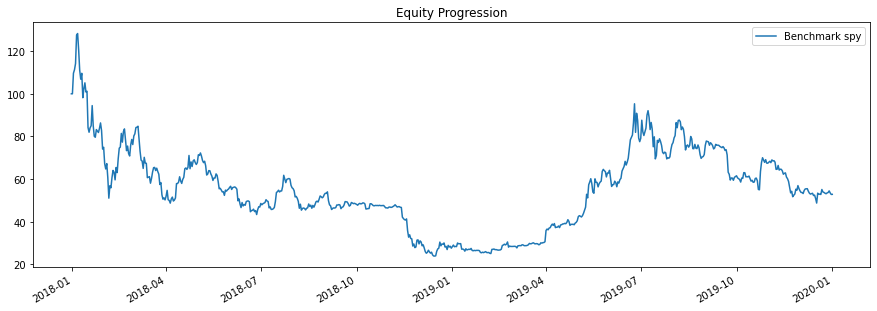

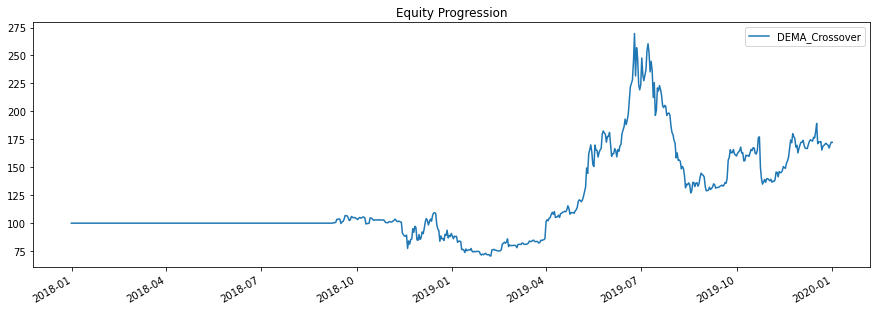

In [171]:
final_boll_run.plot()
test_bench.plot()
test_dema_run.plot()
plt.show()

Stat                 Tree Strategy    Benchmark spy    BDands_Crossover_Up    DEMA_Crossover
-------------------  ---------------  ---------------  ---------------------  ----------------
Start                2017-12-31       2017-12-31       2017-12-31             2017-12-31
End                  2020-01-01       2020-01-01       2020-01-01             2020-01-01
Risk-free rate       0.00%            0.00%            0.00%                  0.00%

Total Return         24.29%           -47.14%          54.26%                 72.33%
Daily Sharpe         0.39             -0.04            0.71                   0.64
Daily Sortino        0.64             -0.07            1.17                   0.99
CAGR                 11.48%           -27.28%          24.18%                 31.25%
Max Drawdown         -45.33%          -81.34%          -21.16%                -52.87%
Calmar Ratio         0.25             -0.34            1.14                   0.59

MTD                  0.02%            0.09%

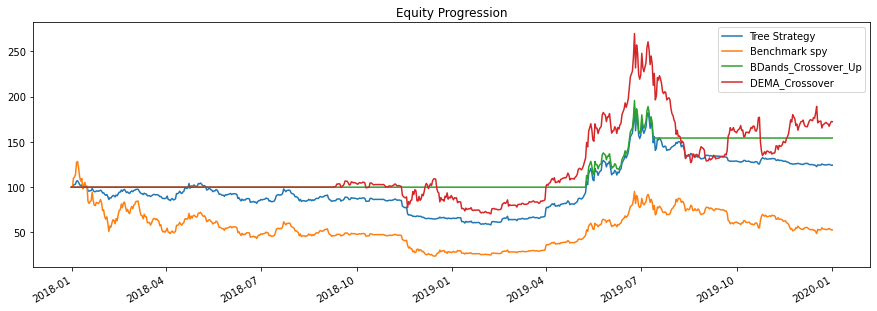

In [214]:


# create the momentum strategy - we will specify the children (3rd argument)
# to limit the universe the strategy can choose from
mom_s = bt.Strategy('mom_s', [bt.algos.RunMonthly(),
                              bt.algos.SelectAll(),
                              bt.algos.SelectMomentum(1),
                              bt.algos.WeighEqually(),
                              bt.algos.Rebalance()],
                              ['BTC-USD'])


# new_mom_s = bt.Strategy('z_mom_s', [bt.algos.RunMonthly(),
#                               bt.algos.SelectAll(),
#                               bt.algos.SelectMomentum(1),
#                               bt.algos.WeighEqually(),
#                               bt.algos.Rebalance()],
#                               [mom_s])

# create the master strategy - this is the top-most node in the tree
# Once again, we are also specifying  the children. In this case, one of the
# children is a Security and the other other 2 are Strategies.
master = bt.Strategy('Tree Strategy', [bt.algos.RunMonthly(),
                                bt.algos.SelectAll(),
                                bt.algos.WeighEqually(),
                                bt.algos.Rebalance()],
                                [dema_crossover, mom_s, bbands])

# create the backtest and run it
test = bt.Backtest(master, test_data)
# create results so we can display and plot
results = bt.run(test)
test_bench = bt.run(test, test_benchmark, backtest_bbands, test_dema_backtest)


test_bench.plot()


# results.display()
# results.plot_security_weights()
plt.savefig('final_graphs')


In [215]:
test_bench.lookback_returns

,Tree Strategy,Benchmark spy,BDands_Crossover_Up,DEMA_Crossover
mtd,0.000212,0.000909,0.000000,-0.000915
3m,-0.035835,-0.141428,0.000000,0.076707
6m,-0.207612,-0.332147,-0.050382,-0.229946
ytd,0.000212,0.000909,0.000000,-0.000915
1y,0.896921,0.864015,0.542599,0.950142
3y,0.114766,-0.272767,0.241830,0.312489
5y,NaN,NaN,NaN,NaN
10y,NaN,NaN,NaN,NaN
incep,0.114766,-0.272767,0.241830,0.312489


In [216]:
test_bench.stats

,Tree Strategy,Benchmark spy,BDands_Crossover_Up,DEMA_Crossover
start,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-12-31 00:00:00
end,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00
rf,0,0,0,0
total_return,0.242887,-0.471363,0.542599,0.723268
cagr,0.114766,-0.272767,0.24183,0.312489
max_drawdown,-0.453347,-0.813404,-0.211602,-0.528728
calmar,0.253152,-0.33534,1.14285,0.59102
mtd,0.000211655,0.0009088,0,-0.000914891
three_month,-0.0358347,-0.141428,0,0.0767072
six_month,-0.207612,-0.332147,-0.0503822,-0.229946


In [179]:
okay im gonna scroll and tell me which grpahs you like

,BTC-USD
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000
...,...
2019-12-28,7317.990234
2019-12-29,7422.652832
2019-12-30,7292.995117
